<a href="https://colab.research.google.com/github/oliverturpo/APRENDIZAJE-SUPERVISADO/blob/main/exposicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

ALPHA = 1.6732632423543772
LAMBDA = 1.0507009873554805

implementacion con SELU

In [11]:
def selu(z):
    if z > 0:
        return LAMBDA * z
    else:
        return LAMBDA * ALPHA * (math.exp(z) - 1)

def selu_derivada(z):
    if z > 0:
        return LAMBDA
    else:
        return LAMBDA * ALPHA * math.exp(z)

aplicar vectores

In [3]:
vector_entrada = [-2.0, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0]
vector_salida = []
vector_derivadas = []

for z in vector_entrada:
    vector_salida.append(selu(z))
    vector_derivadas.append(selu_derivada(z))

for z, y, dy in zip(vector_entrada, vector_salida, vector_derivadas):
    print(f"{z:6.2f}  {y:10.6f}  {dy:10.6f}")

 -2.00   -1.520166    0.237933
 -1.00   -1.111331    0.646769
 -0.50   -0.691758    1.066341
  0.00    0.000000    1.758099
  0.50    0.525350    1.050701
  1.00    1.050701    1.050701
  2.00    2.101402    1.050701


Gráficos SELU y Derivada

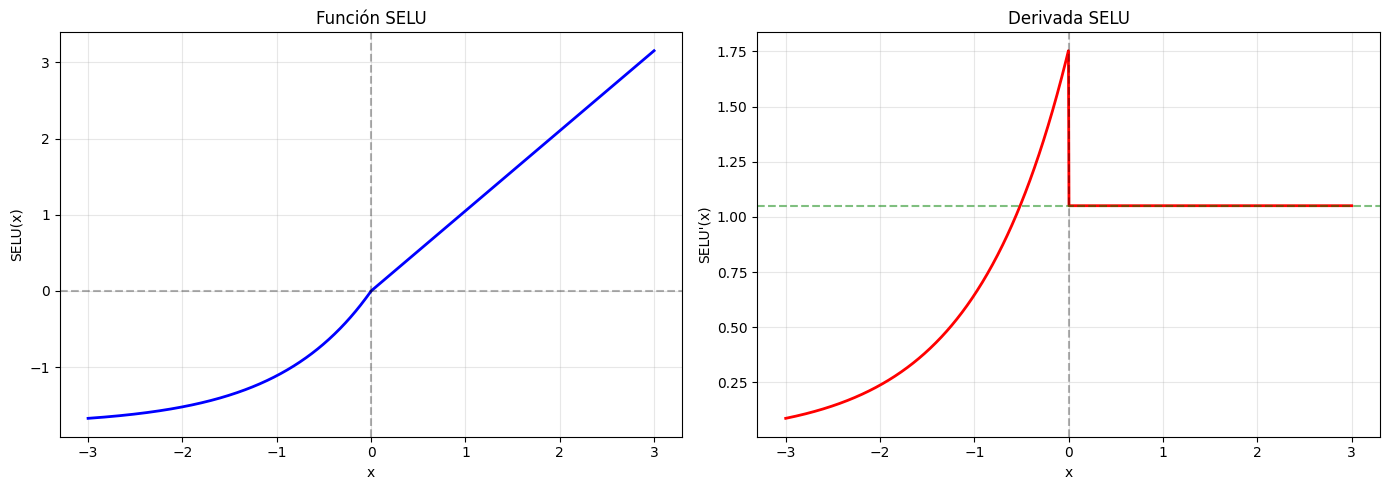

In [4]:
x_plot = np.linspace(-3, 3, 1000)
y_selu = [selu(x) for x in x_plot]
y_derivada = [selu_derivada(x) for x in x_plot]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(x_plot, y_selu, 'b-', linewidth=2)
ax1.axhline(y=0, color='k', linestyle='--', alpha=0.3)
ax1.axvline(x=0, color='k', linestyle='--', alpha=0.3)
ax1.set_xlabel('x')
ax1.set_ylabel('SELU(x)')
ax1.set_title('Función SELU')
ax1.grid(True, alpha=0.3)

ax2.plot(x_plot, y_derivada, 'r-', linewidth=2)
ax2.axhline(y=LAMBDA, color='g', linestyle='--', alpha=0.5)
ax2.axvline(x=0, color='k', linestyle='--', alpha=0.3)
ax2.set_xlabel('x')
ax2.set_ylabel("SELU'(x)")
ax2.set_title('Derivada SELU')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Comparación con Otras Funciones

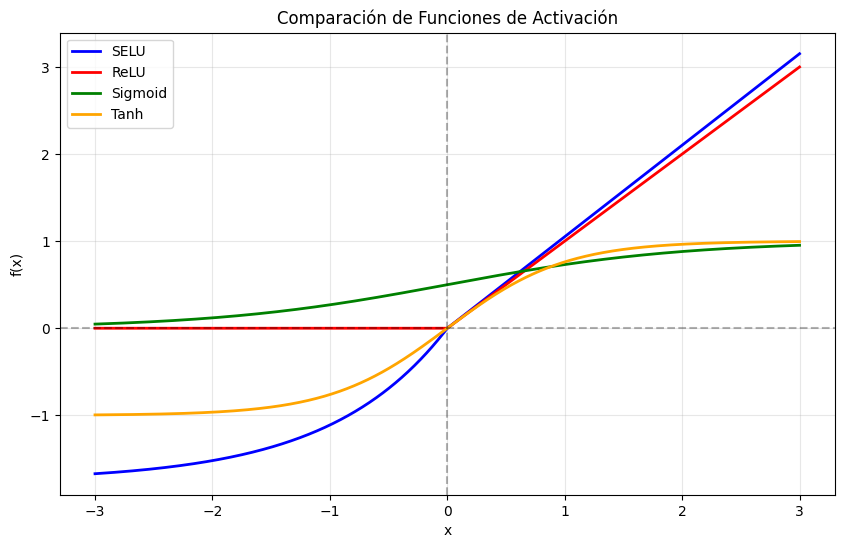

In [5]:
y_relu = [max(0, x) for x in x_plot]
y_sigmoid = [1 / (1 + math.exp(-x)) for x in x_plot]
y_tanh = [math.tanh(x) for x in x_plot]

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_selu, 'b-', linewidth=2, label='SELU')
plt.plot(x_plot, y_relu, 'r-', linewidth=2, label='ReLU')
plt.plot(x_plot, y_sigmoid, 'g-', linewidth=2, label='Sigmoid')
plt.plot(x_plot, y_tanh, 'orange', linewidth=2, label='Tanh')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Comparación de Funciones de Activación')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Ejemplo Numérico Paso a Paso

In [6]:
x = [0.5, -0.3, 1.2]
w = [0.2, 0.4, -0.1]
b = 0.1

z = b
for i in range(len(x)):
    z += w[i] * x[i]

salida = selu(z)
derivada = selu_derivada(z)

print(f"z = {z:.6f}")
print(f"SELU(z) = {salida:.6f}")
print(f"SELU'(z) = {derivada:.6f}")

z = -0.040000
SELU(z) = -0.068936
SELU'(z) = 1.689163


Preparar Dataset

In [7]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                          n_clusters_per_class=1, random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Construir y Entrenar Modelo

In [8]:
model = keras.Sequential([
    layers.Dense(8, activation='selu', kernel_initializer='lecun_normal'),
    layers.Dense(4, activation='selu', kernel_initializer='lecun_normal'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                   epochs=50, batch_size=16, verbose=0)

_, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.8500


Gráficos de Evolución

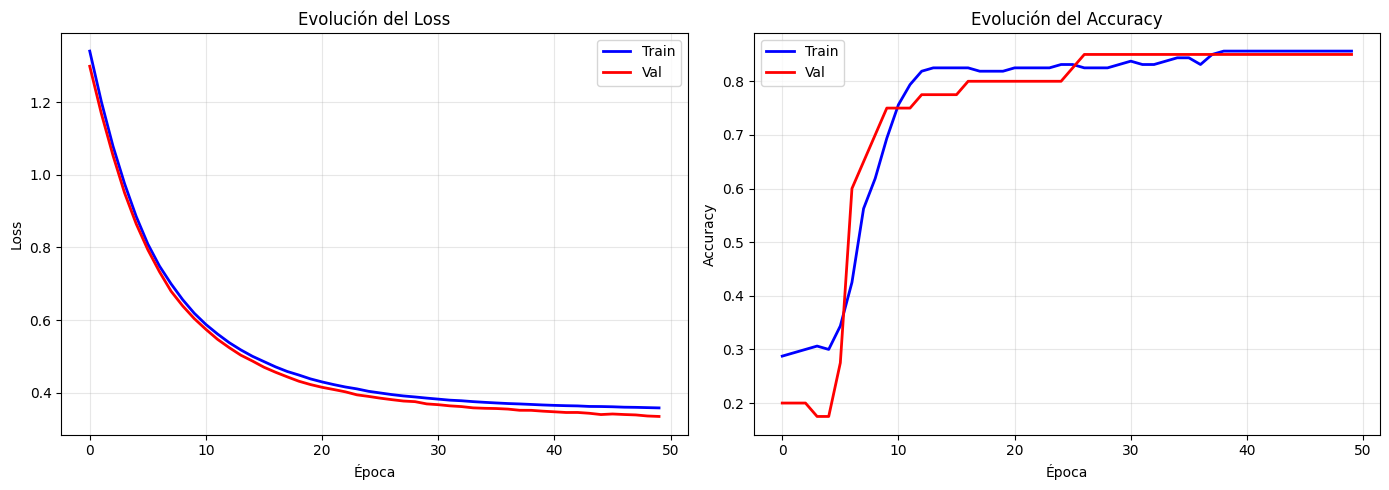

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(history.history['loss'], 'b-', linewidth=2, label='Train')
ax1.plot(history.history['val_loss'], 'r-', linewidth=2, label='Val')
ax1.set_xlabel('Época')
ax1.set_ylabel('Loss')
ax1.set_title('Evolución del Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(history.history['accuracy'], 'b-', linewidth=2, label='Train')
ax2.plot(history.history['val_accuracy'], 'r-', linewidth=2, label='Val')
ax2.set_xlabel('Época')
ax2.set_ylabel('Accuracy')
ax2.set_title('Evolución del Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Predicciones

In [10]:
for i in range(5):
    prob = model.predict(X_test[i:i+1], verbose=0)[0][0]
    pred = 1 if prob > 0.5 else 0
    print(f"Real: {y_test[i]}, Pred: {pred}, Prob: {prob:.4f}")

Real: 0, Pred: 0, Prob: 0.1066
Real: 0, Pred: 1, Prob: 0.8170
Real: 0, Pred: 1, Prob: 0.7256
Real: 1, Pred: 1, Prob: 0.6926
Real: 1, Pred: 1, Prob: 0.8702
